In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

df = pd.read_csv("nfl_data.csv")
df.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78,NaN
4,9/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62,NaN


In [2]:
#Remove columns that aren't needed
df_football = df.drop(['schedule_season', 'schedule_week', 'schedule_playoff', 'team_away', 'team_favorite_id', 'spread_favorite', 'over_under_line', 'stadium', 'stadium_neutral', 'weather_temperature', 'weather_wind_mph', 'weather_humidity', 'weather_detail'], axis=1)


In [3]:
#Add column for wins and losses. True = Win
df_football['win_or_loss'] = df_football['score_home'] > df_football['score_away']
df_football

,schedule_date,team_home,score_home,score_away,win_or_loss
0,9/2/1966,Miami Dolphins,14.0,23.0,False
1,9/3/1966,Houston Oilers,45.0,7.0,True
2,9/4/1966,San Diego Chargers,27.0,7.0,True
3,9/9/1966,Miami Dolphins,14.0,19.0,False
4,9/10/1966,Green Bay Packers,24.0,3.0,True
...,...,...,...,...,...
12929,1/3/2021,New England Patriots,NaN,NaN,False
12930,1/3/2021,New York Giants,NaN,NaN,False
12931,1/3/2021,Philadelphia Eagles,NaN,NaN,False
12932,1/3/2021,San Francisco 49ers,NaN,NaN,False


In [4]:
#Convert boolean to integer
df_football['win_or_loss'] = df.apply(lambda row: row['score_home'] > row['score_away'], axis=1).astype(int)
df_football

,schedule_date,team_home,score_home,score_away,win_or_loss
0,9/2/1966,Miami Dolphins,14.0,23.0,0
1,9/3/1966,Houston Oilers,45.0,7.0,1
2,9/4/1966,San Diego Chargers,27.0,7.0,1
3,9/9/1966,Miami Dolphins,14.0,19.0,0
4,9/10/1966,Green Bay Packers,24.0,3.0,1
...,...,...,...,...,...
12929,1/3/2021,New England Patriots,NaN,NaN,0
12930,1/3/2021,New York Giants,NaN,NaN,0
12931,1/3/2021,Philadelphia Eagles,NaN,NaN,0
12932,1/3/2021,San Francisco 49ers,NaN,NaN,0


In [5]:
#Convert integers to Win or Loss
df_football['win_or_loss'].replace({1: 'Win', 0: 'Loss'}, inplace=True)
df_football

,schedule_date,team_home,score_home,score_away,win_or_loss
0,9/2/1966,Miami Dolphins,14.0,23.0,Loss
1,9/3/1966,Houston Oilers,45.0,7.0,Win
2,9/4/1966,San Diego Chargers,27.0,7.0,Win
3,9/9/1966,Miami Dolphins,14.0,19.0,Loss
4,9/10/1966,Green Bay Packers,24.0,3.0,Win
...,...,...,...,...,...
12929,1/3/2021,New England Patriots,NaN,NaN,Loss
12930,1/3/2021,New York Giants,NaN,NaN,Loss
12931,1/3/2021,Philadelphia Eagles,NaN,NaN,Loss
12932,1/3/2021,San Francisco 49ers,NaN,NaN,Loss


In [6]:
#filter for the Browns
df_football = df_football[df_football["team_home"] == "Cleveland Browns"]
df_football

,schedule_date,team_home,score_home,score_away,win_or_loss
16,9/18/1966,Cleveland Browns,20.0,21.0,Loss
28,9/25/1966,Cleveland Browns,28.0,34.0,Loss
48,10/8/1966,Cleveland Browns,41.0,10.0,Win
72,10/23/1966,Cleveland Browns,30.0,21.0,Win
106,11/13/1966,Cleveland Browns,27.0,7.0,Win
...,...,...,...,...,...
12788,11/1/2020,Cleveland Browns,6.0,16.0,Loss
12814,11/15/2020,Cleveland Browns,NaN,NaN,Loss
12828,11/22/2020,Cleveland Browns,NaN,NaN,Loss
12885,12/14/2020,Cleveland Browns,NaN,NaN,Loss


In [7]:
#read in the weather file
weather_df = pd.read_csv("history_data (2).csv")
weather_df.head()

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,...,Unnamed: 16360,Unnamed: 16361,Unnamed: 16362,Unnamed: 16363,Unnamed: 16364,Unnamed: 16365,Unnamed: 16366,Unnamed: 16367,Unnamed: 16368,Unnamed: 16369
0,"Cleveland, OH, United States",9/8/1985,91.1,71.0,78.6,NaN,100.9,2.19,NaN,17.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Cleveland, OH, United States",9/16/1985,70.1,43.1,58.7,NaN,NaN,0.00,NaN,11.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Cleveland, OH, United States",10/6/1985,53.9,38.9,46.2,32.2,NaN,0.00,NaN,13.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Cleveland, OH, United States",10/20/1985,56.9,48.8,53.5,44.1,NaN,0.06,NaN,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Cleveland, OH, United States",10/27/1985,62.0,44.9,52.5,41.0,NaN,0.00,NaN,10.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#list(weather_df.columns) 

In [9]:
#Getting rid of empty columns
weather_df_slim = weather_df[['Name',
 'Date time',
 'Maximum Temperature',
 'Minimum Temperature',
 'Temperature',
 'Wind Chill',
 'Heat Index',
 'Precipitation',
 'Snow Depth',
 'Wind Speed',
 'Wind Gust',
 'Visibility',
 'Cloud Cover',
 'Relative Humidity',
 'Conditions']]
weather_df_slim.head()
#list(weather_df.columns) 

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,"Cleveland, OH, United States",9/8/1985,91.1,71.0,78.6,NaN,100.9,2.19,NaN,17.2,NaN,9.0,94.7,75.94,"Rain, Overcast"
1,"Cleveland, OH, United States",9/16/1985,70.1,43.1,58.7,NaN,NaN,0.00,NaN,11.4,NaN,15.1,12.3,64.64,Clear
2,"Cleveland, OH, United States",10/6/1985,53.9,38.9,46.2,32.2,NaN,0.00,NaN,13.9,NaN,16.5,53.9,71.97,Partially cloudy
3,"Cleveland, OH, United States",10/20/1985,56.9,48.8,53.5,44.1,NaN,0.06,NaN,15.0,NaN,12.7,100.0,71.57,"Rain, Overcast"
4,"Cleveland, OH, United States",10/27/1985,62.0,44.9,52.5,41.0,NaN,0.00,NaN,10.3,NaN,17.9,74.3,54.68,Partially cloudy


In [10]:
#schedule_date	team_home	score_home	score_away

total_data = pd.merge(weather_df_slim, df_football, left_on="Date time", right_on="schedule_date")
total_data.head()

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions,schedule_date,team_home,score_home,score_away,win_or_loss
0,"Cleveland, OH, United States",9/8/1985,91.1,71.0,78.6,NaN,100.9,2.19,NaN,17.2,NaN,9.0,94.7,75.94,"Rain, Overcast",9/8/1985,Cleveland Browns,24.0,27.0,Loss
1,"Cleveland, OH, United States",9/16/1985,70.1,43.1,58.7,NaN,NaN,0.00,NaN,11.4,NaN,15.1,12.3,64.64,Clear,9/16/1985,Cleveland Browns,17.0,7.0,Win
2,"Cleveland, OH, United States",10/6/1985,53.9,38.9,46.2,32.2,NaN,0.00,NaN,13.9,NaN,16.5,53.9,71.97,Partially cloudy,10/6/1985,Cleveland Browns,24.0,20.0,Win
3,"Cleveland, OH, United States",10/20/1985,56.9,48.8,53.5,44.1,NaN,0.06,NaN,15.0,NaN,12.7,100.0,71.57,"Rain, Overcast",10/20/1985,Cleveland Browns,20.0,21.0,Loss
4,"Cleveland, OH, United States",10/27/1985,62.0,44.9,52.5,41.0,NaN,0.00,NaN,10.3,NaN,17.9,74.3,54.68,Partially cloudy,10/27/1985,Cleveland Browns,7.0,14.0,Loss


In [11]:
#what are all of the weather conditions?
data_groups = total_data.groupby("Conditions")
Condition_list = data_groups.count()
Condition_list

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,schedule_date,team_home,score_home,score_away,win_or_loss
Conditions,,,,,,,,,,,,,,,,,,,
Clear,5,5,5,5,5,3,0,5,0,5,0,5,5,5,5,5,5,5,5
Overcast,21,21,21,21,21,17,1,21,6,21,0,21,21,21,21,21,21,21,21
Partially cloudy,24,24,24,24,24,16,3,24,2,24,0,24,24,24,24,24,24,24,24
Rain,1,1,1,1,1,1,0,1,0,1,0,1,1,1,1,1,1,1,1
"Rain, Overcast",28,28,28,28,28,19,1,28,5,28,0,28,28,28,28,28,28,28,28
"Rain, Partially cloudy",4,4,4,4,4,3,0,4,2,4,0,4,4,4,4,4,4,4,4


In [12]:
#Changing to raining or dry
total_data.replace({"Clear": "Dry", "Overcast": "Dry", "Partially cloudy": "Dry", "Rain, Overcast": "Rain", "Rain, Partially cloudy" : "Rain"}, inplace=True)
total_data.head()

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions,schedule_date,team_home,score_home,score_away,win_or_loss
0,"Cleveland, OH, United States",9/8/1985,91.1,71.0,78.6,NaN,100.9,2.19,NaN,17.2,NaN,9.0,94.7,75.94,Rain,9/8/1985,Cleveland Browns,24.0,27.0,Loss
1,"Cleveland, OH, United States",9/16/1985,70.1,43.1,58.7,NaN,NaN,0.00,NaN,11.4,NaN,15.1,12.3,64.64,Dry,9/16/1985,Cleveland Browns,17.0,7.0,Win
2,"Cleveland, OH, United States",10/6/1985,53.9,38.9,46.2,32.2,NaN,0.00,NaN,13.9,NaN,16.5,53.9,71.97,Dry,10/6/1985,Cleveland Browns,24.0,20.0,Win
3,"Cleveland, OH, United States",10/20/1985,56.9,48.8,53.5,44.1,NaN,0.06,NaN,15.0,NaN,12.7,100.0,71.57,Rain,10/20/1985,Cleveland Browns,20.0,21.0,Loss
4,"Cleveland, OH, United States",10/27/1985,62.0,44.9,52.5,41.0,NaN,0.00,NaN,10.3,NaN,17.9,74.3,54.68,Dry,10/27/1985,Cleveland Browns,7.0,14.0,Loss


In [13]:
rain_win_df = total_data[(total_data["Conditions"] == "Rain") & (total_data["win_or_loss"] == "Win")]
rain_win_df.head()

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions,schedule_date,team_home,score_home,score_away,win_or_loss
10,"Cleveland, OH, United States",10/12/1986,70.1,53.9,61.6,NaN,NaN,0.01,NaN,23.0,NaN,9.6,93.9,69.64,Rain,10/12/1986,Cleveland Browns,20.0,7.0,Win
13,"Cleveland, OH, United States",11/23/1986,48.8,33.2,42.7,27.0,NaN,0.01,NaN,18.3,NaN,10.3,83.5,82.39,Rain,11/23/1986,Cleveland Browns,37.0,31.0,Win
20,"Cleveland, OH, United States",11/8/1987,64.1,44.9,54.5,39.1,NaN,0.08,NaN,16.1,NaN,5.5,97.0,54.35,Rain,11/8/1987,Cleveland Browns,38.0,3.0,Win
30,"Cleveland, OH, United States",11/20/1988,47.9,41.1,45.8,33.4,NaN,1.19,NaN,19.7,NaN,4.3,100.0,95.86,Rain,11/20/1988,Cleveland Browns,27.0,7.0,Win
32,"Cleveland, OH, United States",12/18/1988,24.2,17.0,20.1,4.0,NaN,0.04,4.33,18.3,NaN,5.2,98.7,81.51,Rain,12/18/1988,Cleveland Browns,28.0,23.0,Win


In [14]:
rain_loss_df = total_data[(total_data["Conditions"] == "Rain") & (total_data["win_or_loss"] == "Loss")]
rain_loss_df.head()

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions,schedule_date,team_home,score_home,score_away,win_or_loss
0,"Cleveland, OH, United States",9/8/1985,91.1,71.0,78.6,NaN,100.9,2.19,NaN,17.2,NaN,9.0,94.7,75.94,Rain,9/8/1985,Cleveland Browns,24.0,27.0,Loss
3,"Cleveland, OH, United States",10/20/1985,56.9,48.8,53.5,44.1,NaN,0.06,NaN,15.0,NaN,12.7,100.0,71.57,Rain,10/20/1985,Cleveland Browns,20.0,21.0,Loss
8,"Cleveland, OH, United States",9/18/1986,70.1,56.9,62.9,NaN,NaN,0.22,NaN,13.9,NaN,8.5,99.6,79.31,Rain,9/18/1986,Cleveland Browns,13.0,30.0,Loss
17,"Cleveland, OH, United States",1/11/1987,33.2,29.0,30.5,15.9,NaN,0.02,0.39,25.3,NaN,5.6,100.0,81.91,Rain,1/11/1987,Cleveland Browns,20.0,23.0,Loss
27,"Cleveland, OH, United States",10/9/1988,59.1,44.9,50.3,40.0,NaN,0.01,NaN,11.6,NaN,12.5,96.1,67.19,Rain,10/9/1988,Cleveland Browns,10.0,16.0,Loss


In [15]:
dry_win_df = total_data[(total_data["Conditions"] == "Dry") & (total_data["win_or_loss"] == "Win")]
dry_win_df.head()

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions,schedule_date,team_home,score_home,score_away,win_or_loss
1,"Cleveland, OH, United States",9/16/1985,70.1,43.1,58.7,NaN,NaN,0.0,NaN,11.4,NaN,15.1,12.3,64.64,Dry,9/16/1985,Cleveland Browns,17.0,7.0,Win
2,"Cleveland, OH, United States",10/6/1985,53.9,38.9,46.2,32.2,NaN,0.0,NaN,13.9,NaN,16.5,53.9,71.97,Dry,10/6/1985,Cleveland Browns,24.0,20.0,Win
5,"Cleveland, OH, United States",11/17/1985,51.2,20.3,43.3,8.2,NaN,0.0,NaN,18.3,NaN,16.4,71.3,72.40,Dry,11/17/1985,Cleveland Browns,17.0,7.0,Win
6,"Cleveland, OH, United States",11/24/1985,41.1,29.0,34.2,23.9,NaN,0.0,NaN,17.2,NaN,11.6,86.5,73.84,Dry,11/24/1985,Cleveland Browns,24.0,6.0,Win
7,"Cleveland, OH, United States",12/15/1985,26.9,10.1,20.2,-5.8,NaN,0.0,1.97,27.7,NaN,12.9,92.6,72.73,Dry,12/15/1985,Cleveland Browns,28.0,21.0,Win


In [16]:
dry_loss_df = total_data[(total_data["Conditions"] == "Dry") & (total_data["win_or_loss"] == "Loss")]
dry_loss_df.head()

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions,schedule_date,team_home,score_home,score_away,win_or_loss
4,"Cleveland, OH, United States",10/27/1985,62.0,44.9,52.5,41.0,NaN,0.0,NaN,10.3,NaN,17.9,74.3,54.68,Dry,10/27/1985,Cleveland Browns,7.0,14.0,Loss
22,"Cleveland, OH, United States",12/6/1987,34.1,24.2,30.7,17.1,NaN,0.0,1.97,9.2,NaN,15.1,87.0,78.19,Dry,12/6/1987,Cleveland Browns,7.0,9.0,Loss
25,"Cleveland, OH, United States",9/11/1988,79.1,53.9,65.2,NaN,NaN,0.0,NaN,9.2,NaN,11.7,34.3,73.34,Dry,9/11/1988,Cleveland Browns,3.0,23.0,Loss
36,"Cleveland, OH, United States",10/15/1989,80.0,56.9,68.5,NaN,NaN,0.0,NaN,20.8,NaN,9.0,63.0,63.95,Dry,10/15/1989,Cleveland Browns,7.0,17.0,Loss
39,"Cleveland, OH, United States",11/19/1989,44.9,19.1,30.4,9.1,NaN,0.0,3.94,19.7,NaN,13.4,90.0,64.31,Dry,11/19/1989,Cleveland Browns,10.0,10.0,Loss


In [17]:
points_df = total_data[["Temperature", "Precipitation", "score_home"]]
points_df.head()

,Temperature,Precipitation,score_home
0,78.6,2.19,24.0
1,58.7,0.00,17.0
2,46.2,0.00,24.0
3,53.5,0.06,20.0
4,52.5,0.00,7.0


In [18]:
#Create a scatter plot of temperature and Brown total game points

In [19]:
# Create a list of data 
# to be represented in x-axis 
x_axis = points_df['score_home']


In [20]:
# Create a list of data 
# to be represented in y-axis 
y_axis = points_df['Temperature']

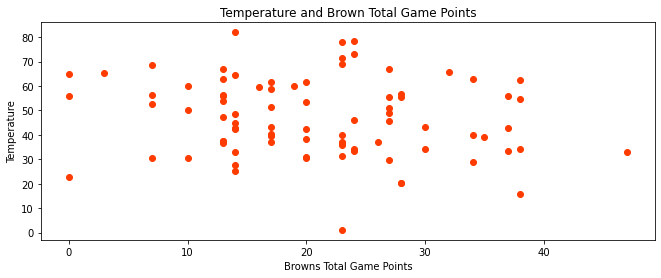

In [21]:
plt.figure(figsize=(11,4))
plt.scatter(x_axis, y_axis, color='#FF3C00')
plt.title("Temperature and Brown Total Game Points")
plt.xlabel("Browns Total Game Points")
plt.ylabel("Temperature")
plt.savefig("images/temperature_points.png")
plt.show()

In [22]:
#create a scatter plot of precipitation compared to Browns total game points

In [23]:

# Create a list of data 
# to be represented in x-axis 
x_axis = points_df['score_home']

In [24]:
# Create a list of data 
# to be represented in y-axis 
y_axis = points_df['Precipitation']

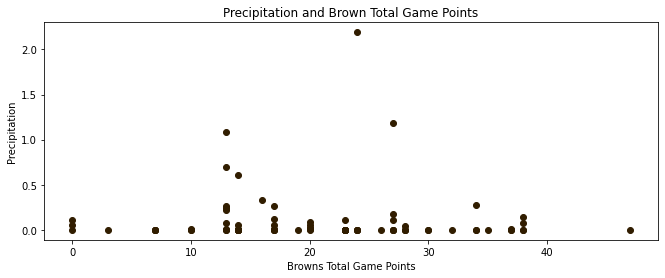

In [25]:
plt.figure(figsize=(11,4))
plt.scatter(x_axis, y_axis, color='#311d00')
plt.title("Precipitation and Brown Total Game Points")
plt.xlabel("Browns Total Game Points")
plt.ylabel("Precipitation")
plt.savefig("images/precip_points.png")
plt.show()

In [26]:
#creating a grid plot to compare score versus precipitation levels

In [27]:
# convert all columns of DataFrame
points_plot_df = points_df.apply(pd.to_numeric) # convert all columns of DataFrame


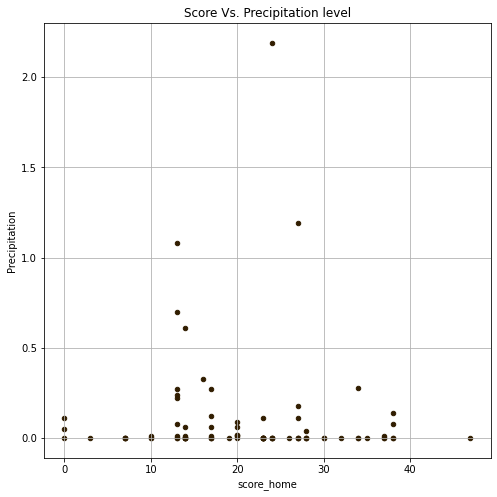

In [28]:
#plot Score vs Precipitation scatter plot
points_plot_df.plot(kind="scatter", x="score_home", y="Precipitation", grid=True, figsize=(8,8),color='#311d00',
              title="Score Vs. Precipitation level")
plt.savefig("images/precip_points_grid.png")
plt.show()

In [29]:
#Creating a grid plot of score versus temperature in Cleveland, Ohio

In [30]:
# convert all columns of DataFrame
points_plot_df = points_df.apply(pd.to_numeric) # convert all columns of DataFrame

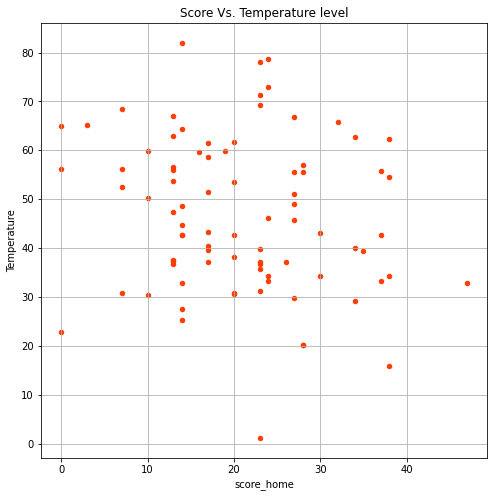

In [31]:
#plot scatter plot
points_plot_df.plot(kind="scatter", x="score_home", y="Temperature", grid=True, figsize=(8,8),color='#ff3c00',
              title="Score Vs. Temperature level")
plt.savefig("images/temp_points_grid.png")
plt.show()

In [32]:
#Correlating precipitation and score with linear regression 

In [33]:
#Correlation calc for Temp and Score
temp = points_df.iloc[:,0]
score = points_df.iloc[:,2]
correlation = st.pearsonr(temp,score)
print(f"The correlation between Temp and Score is {round(correlation[0],2)}")

The correlation between Temp and Score is -0.16


In [34]:
#Correlation calc for Precipitation and Score
precip = points_df.iloc[:,1]
score = points_df.iloc[:,2]
correlation = st.pearsonr(precip,score)
print(f"The correlation between Temp and Score is {round(correlation[0],2)}")

The correlation between Temp and Score is -0.03


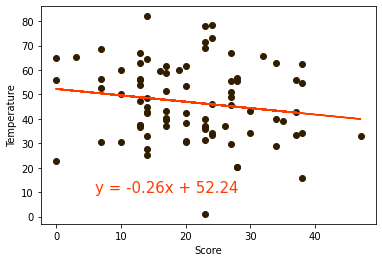

In [35]:
# Add the linear regression equation and line to plot
points_df = points_df[points_df['score_home']>=0]
x_values = points_df['score_home']
y_values = points_df['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color='#311d00')
plt.plot(x_values,regress_values,"r-",color='#ff3c00')
plt.annotate(line_eq,(6,10),fontsize=15,color="#ff3c00")
plt.xlabel('Score')
plt.ylabel('Temperature')
plt.savefig("images/temp_score_regression.png")
plt.show()

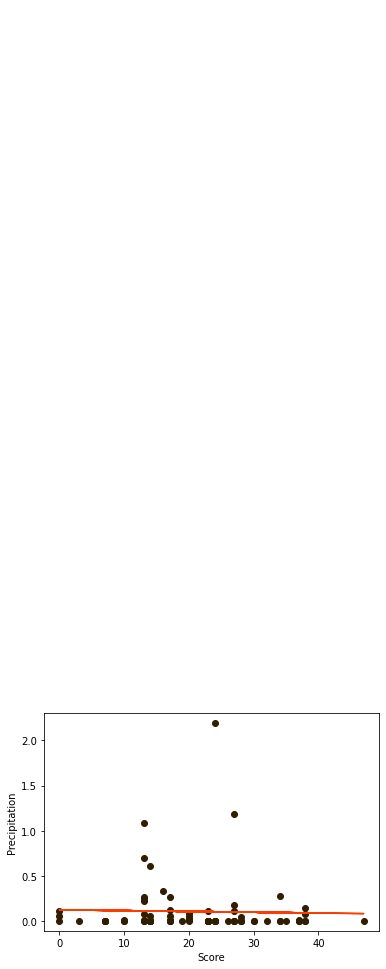

In [43]:
# Add the linear regression equation and line to plot
points_df = points_df[points_df['score_home']>=0]
x_values = points_df['score_home']
y_values = points_df['Precipitation']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color='#311d00')
plt.plot(x_values,regress_values,"r-",color='#ff3c00')
plt.annotate(line_eq,(6,10),fontsize=15,color="#ff3c00")
plt.xlabel('Score')
plt.ylabel('Precipitation')
plt.savefig("images/prec_score_regression.png")
plt.show()

In [37]:
#creating a bar chart to compare total wins and losses in wet weather

In [38]:
rain_df = total_data[(total_data["Conditions"] == "Rain")]
rain_df.head()
rain_groups = rain_df.groupby('win_or_loss')
rain_count = rain_groups.count()
rain_count.reset_index(level=0, inplace=True)
rain_count


,win_or_loss,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions,schedule_date,team_home,score_home,score_away
0,Loss,15,15,15,15,15,10,1,15,4,15,0,15,15,15,15,15,15,15,15
1,Win,18,18,18,18,18,13,0,18,3,18,0,18,18,18,18,18,18,18,18


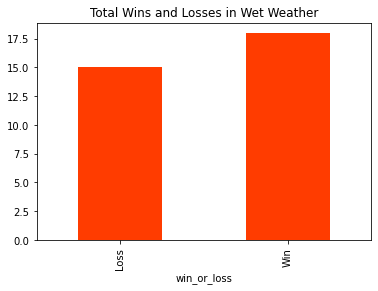

In [39]:
rain_count.plot(kind='bar',x='win_or_loss',y='Name', color='#ff3c00', legend=False, title="Total Wins and Losses in Wet Weather")
plt.savefig("images/bar_wet.png")

In [40]:
#creating a bar chart to compare total wins and losses in dry weather

In [41]:
dry_df = total_data[(total_data["Conditions"] == "Dry")]
dry_df.head()
dry_groups = dry_df.groupby('win_or_loss')
dry_count = dry_groups.count()
dry_count.reset_index(level=0, inplace=True)
dry_count


,win_or_loss,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions,schedule_date,team_home,score_home,score_away
0,Loss,18,18,18,18,18,13,1,18,4,18,0,18,18,18,18,18,18,18,18
1,Win,32,32,32,32,32,23,3,32,4,32,0,32,32,32,32,32,32,32,32


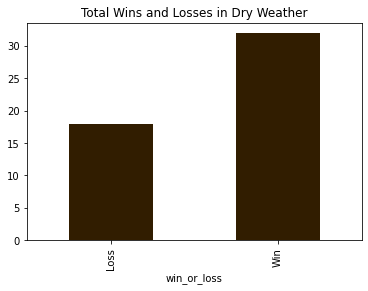

In [42]:
dry_count.plot(kind='bar',x='win_or_loss',y='Name', color='#311d00', legend=False, title="Total Wins and Losses in Dry Weather")
plt.savefig("images/bar_dry.png")